In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import itertools as it
from scipy.special import comb

import matplotlib
font = {'size'   : 11}
matplotlib.rc('font', **font)

In [2]:
#'''
data_s = np.loadtxt('synthmeasuresAuto_NOrder_3.txt')
data_d = np.loadtxt('synthmeasuresDense_NOrder_3.txt')

data_s2 = np.loadtxt('synthmeasuresAuto_Skeleton_3.txt')
data_d2 = np.loadtxt('synthmeasuresDense_Skeleton_3.txt')

print()

In [6]:
colors=['tab:blue','tab:cyan','tab:red','tab:orange','tab:green','tab:olive','tab:purple','tab:pink','k','tab:gray']
legends=['G2PC', 'FisherPC', 'G2Connected', 'FisherConnected', 'G2Knee', 'FisherKnee', 'G2pvalConnected', 'G2pvalKnee', 'NIConnected', 'NIKnee'] 
data=[data_s,data_d,data_s2,data_d2]
title=['DAG/Controlled','DAG/Matrix','Skeleton/Controlled','Skeleton/Matrix']
base=np.array([2,6,13,20,27,34,41,48,55,62])

base=np.array([2,6,20,34,41,48,55,62])
legends=['G2PC', 'FisherPC', 'FisherConnected', 'FisherKnee', 'G2Connected', 'G2Knee', 'NIConnected', 'NIKnee']

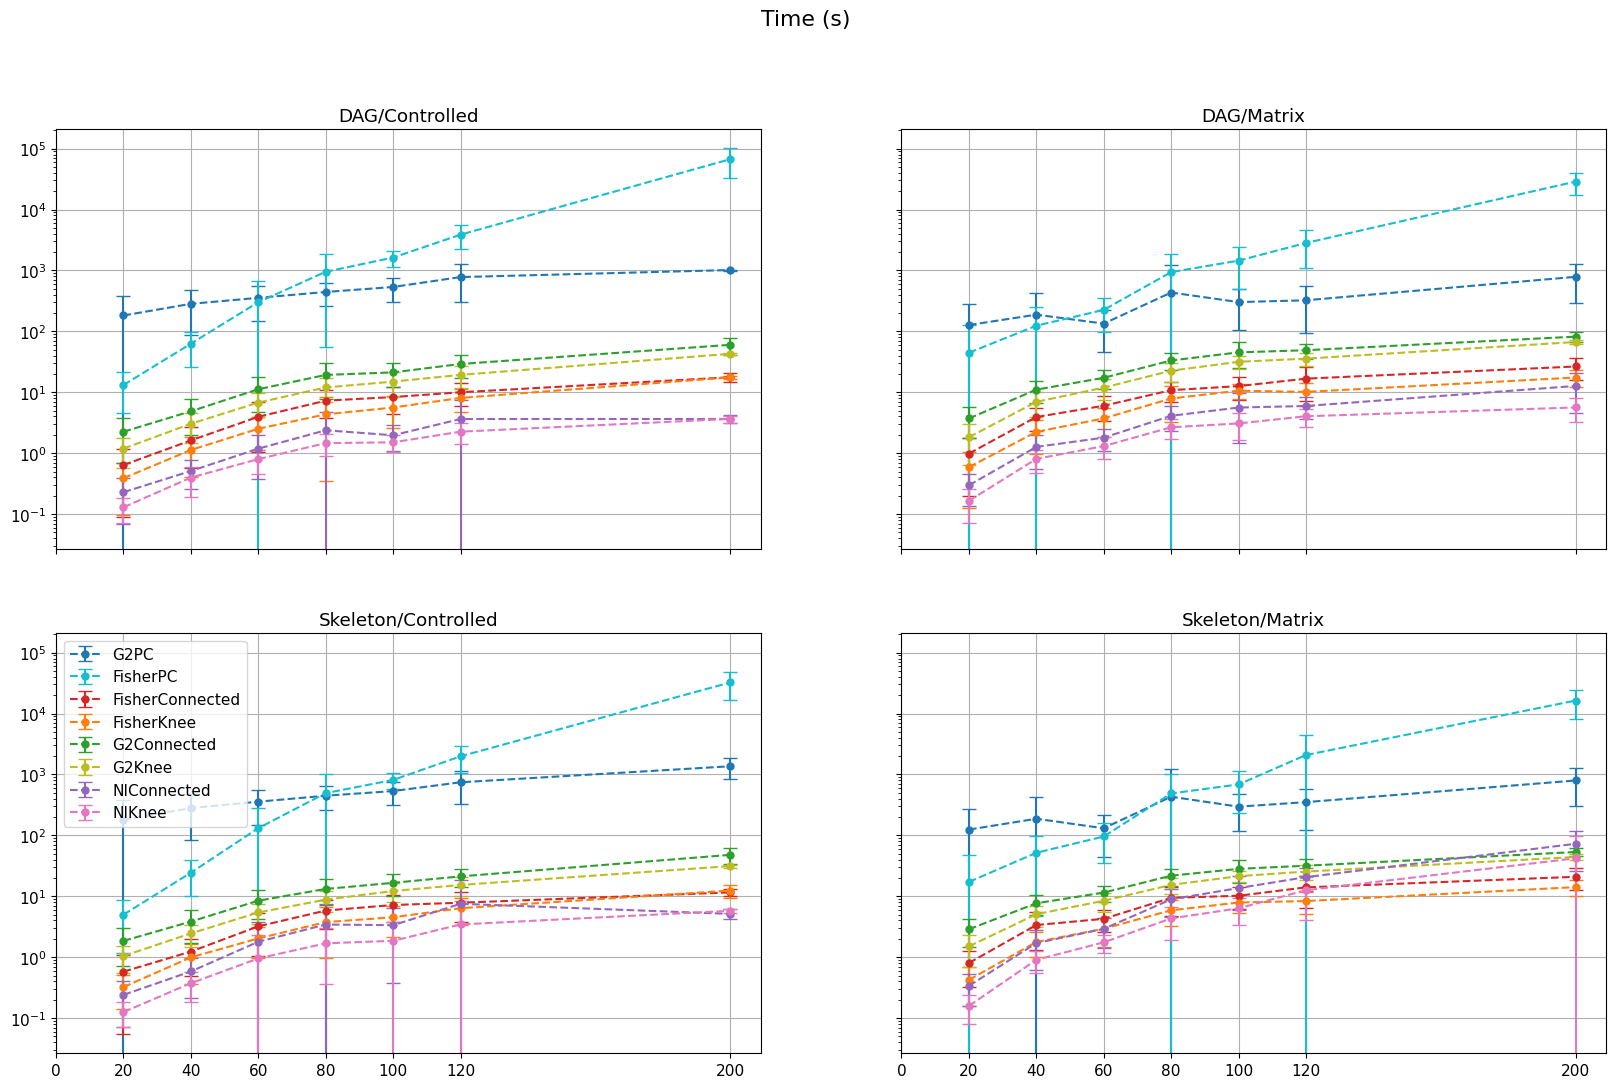

In [7]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
#axe[2].plot(outlier1[0],outlier1[2],'x',color=colors[0])
#axe[1].plot(outlier2[0],outlier2[2],'x',color=colors[0])
#axe[1].plot(outlier3[0],outlier3[2],'x',color=colors[0])
#axe[1].plot(outlier4[0],outlier4[2],'x',color=colors[0])

pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.yscale("log")
pl.show()

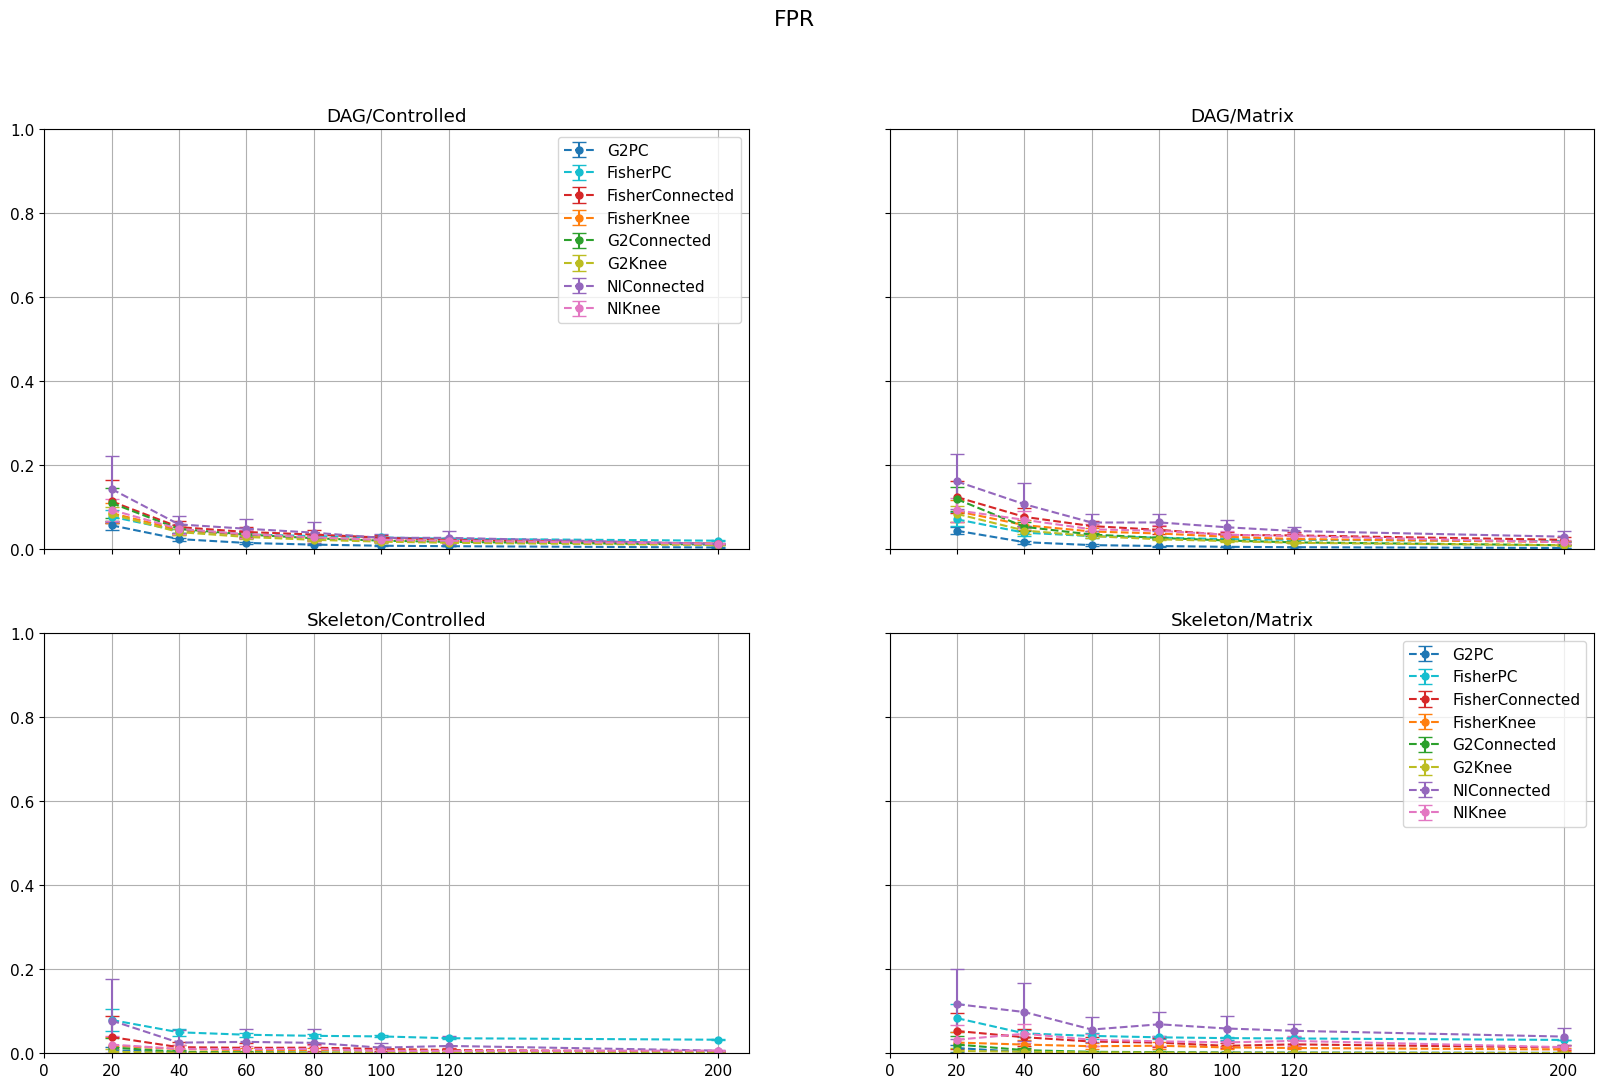

In [8]:
#False Positive Rate
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base+1
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[0].legend()

pl.suptitle("FPR",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,1)
pl.legend()
pl.show()

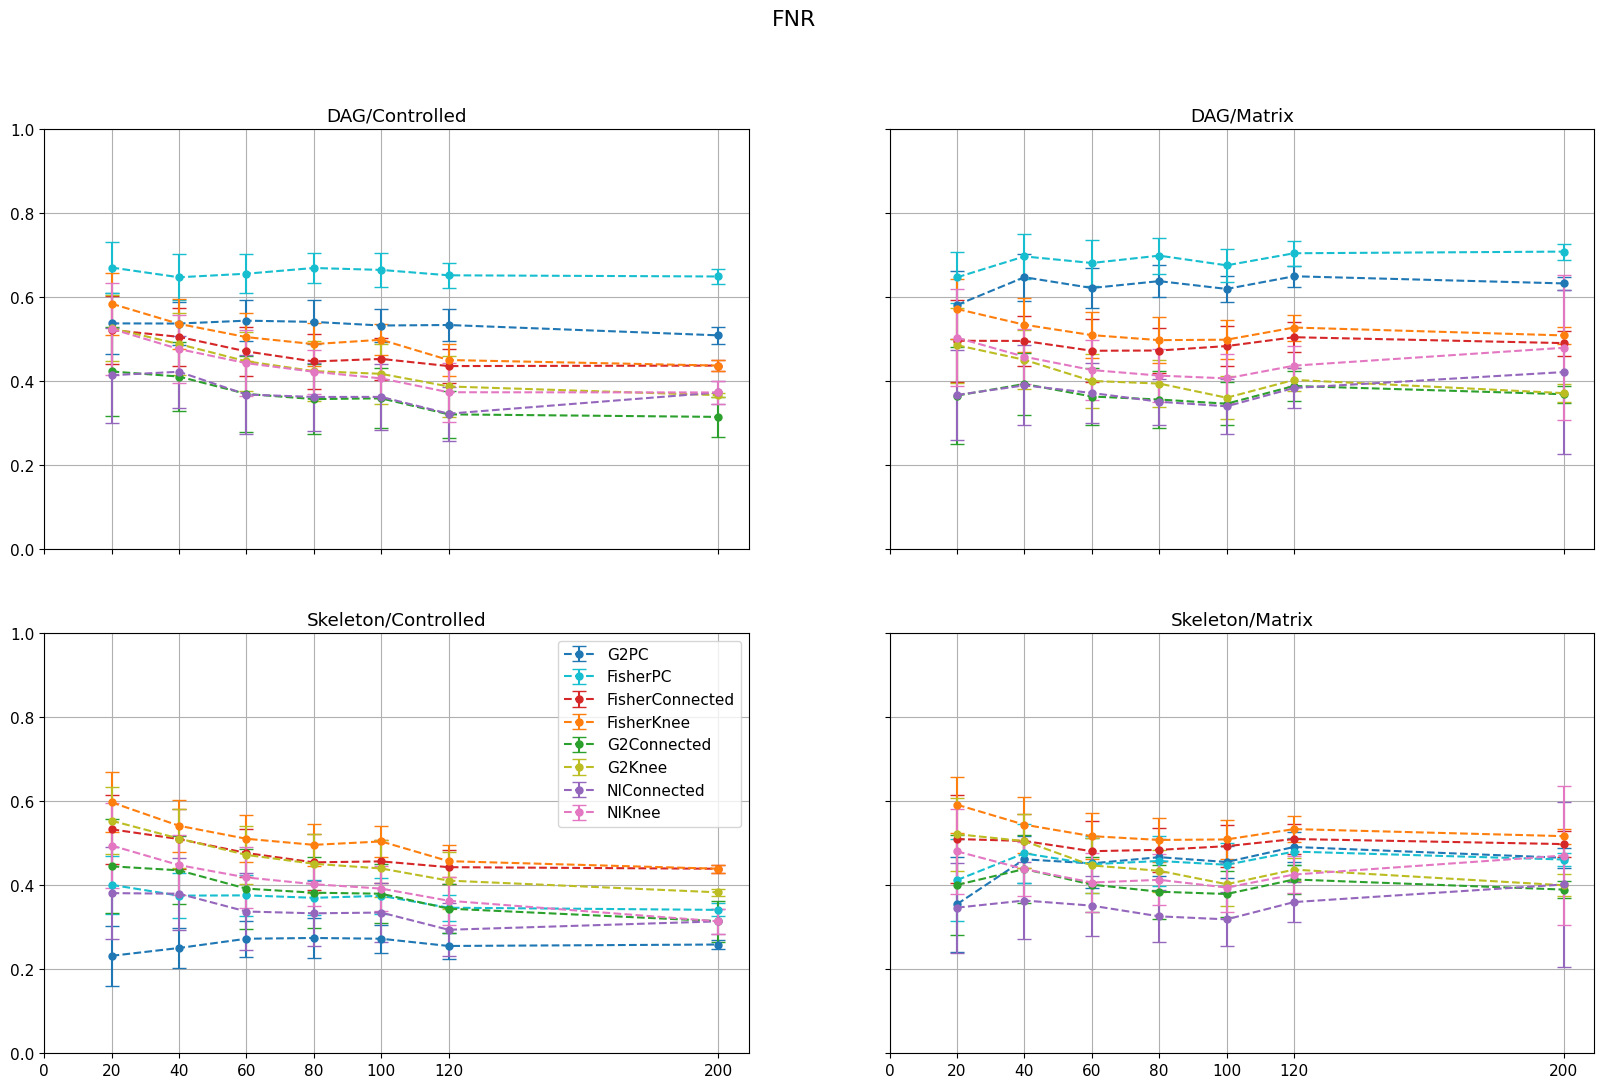

In [9]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base+2
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()

pl.suptitle("FNR",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,1)
pl.show()

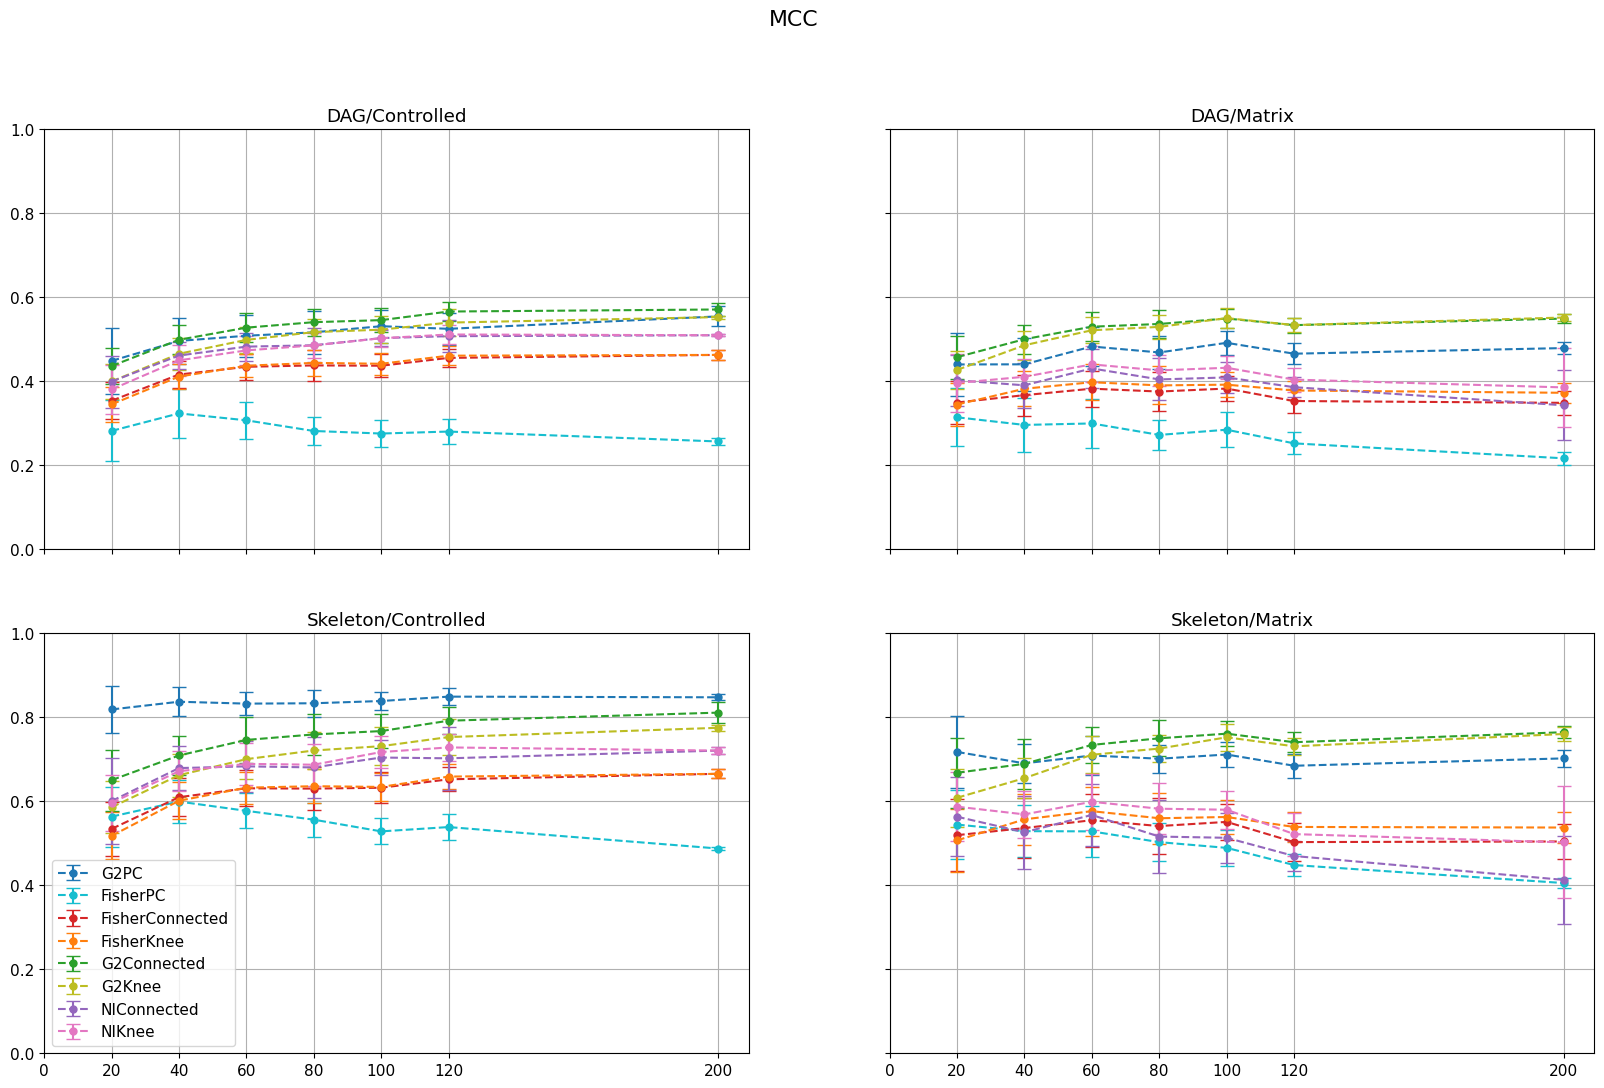

In [10]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base+3
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()

pl.suptitle("MCC",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,1)
pl.show()

In [11]:
j=1
[len(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes]

[20, 20, 20, 20, 20, 17, 6]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


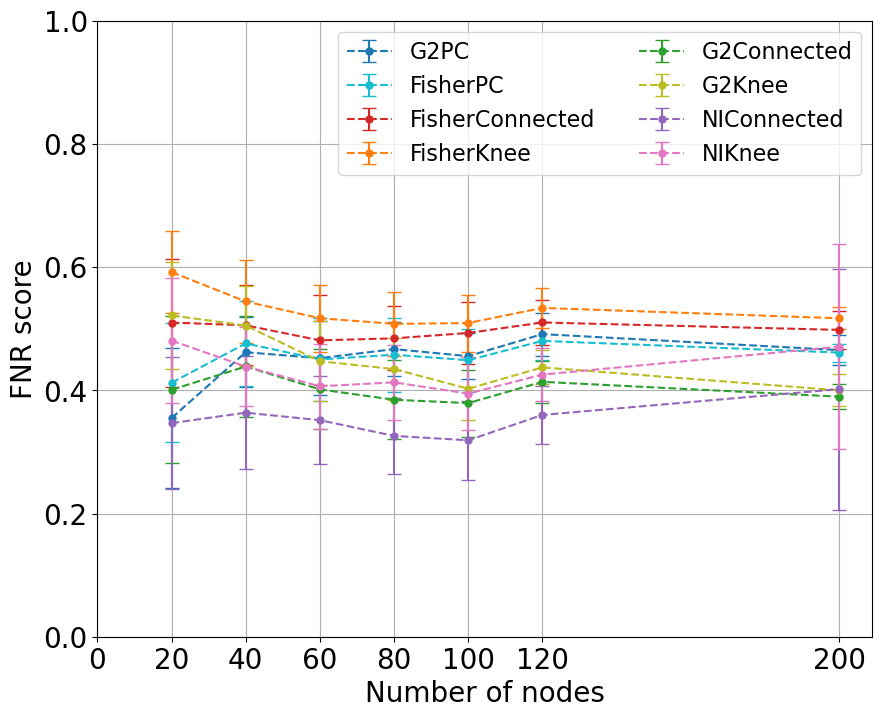

In [12]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base+2
j=3
n_nodes = np.unique(data[j][:,0]) ##number of nodes

for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,1)
pl.legend(ncols=2,prop={'size': 16})
pl.ylabel("FNR score")
pl.xlabel("Number of nodes")
pl.savefig("FNR_DenseSkeleton_3.eps",format='eps')
pl.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


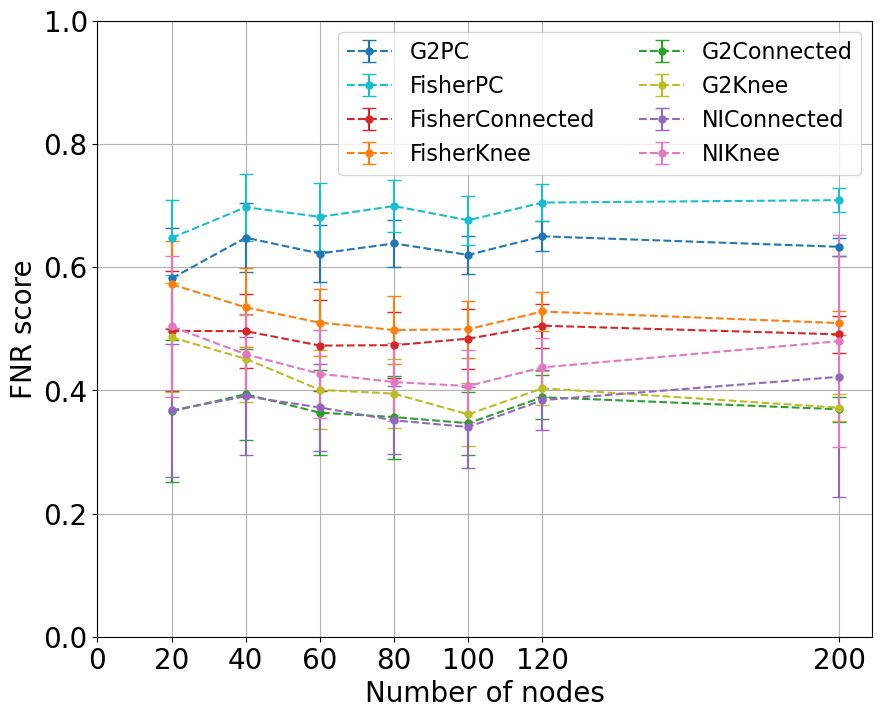

In [13]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base+2
j=1
n_nodes = np.unique(data[j][:,0]) ##number of nodes

for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,1)
pl.legend(ncols=2,prop={'size': 16})
pl.ylabel("FNR score")
pl.xlabel("Number of nodes")
pl.savefig("FNR_DenseNO_3.eps",format='eps')
pl.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


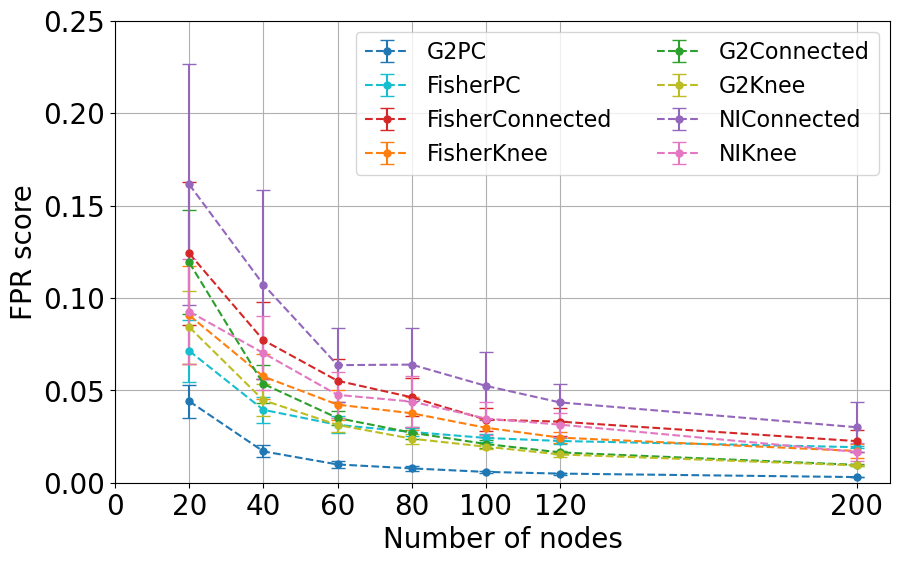

In [14]:
pl.figure(figsize=(10,6))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base+1
j=1
n_nodes = np.unique(data[j][:,0]) ##number of nodes

for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,0.25)
pl.legend(ncols=2,prop={'size': 16})
pl.ylabel("FPR score")
pl.xlabel("Number of nodes")
pl.savefig("FPR_DenseNO_3.eps",format='eps')
pl.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


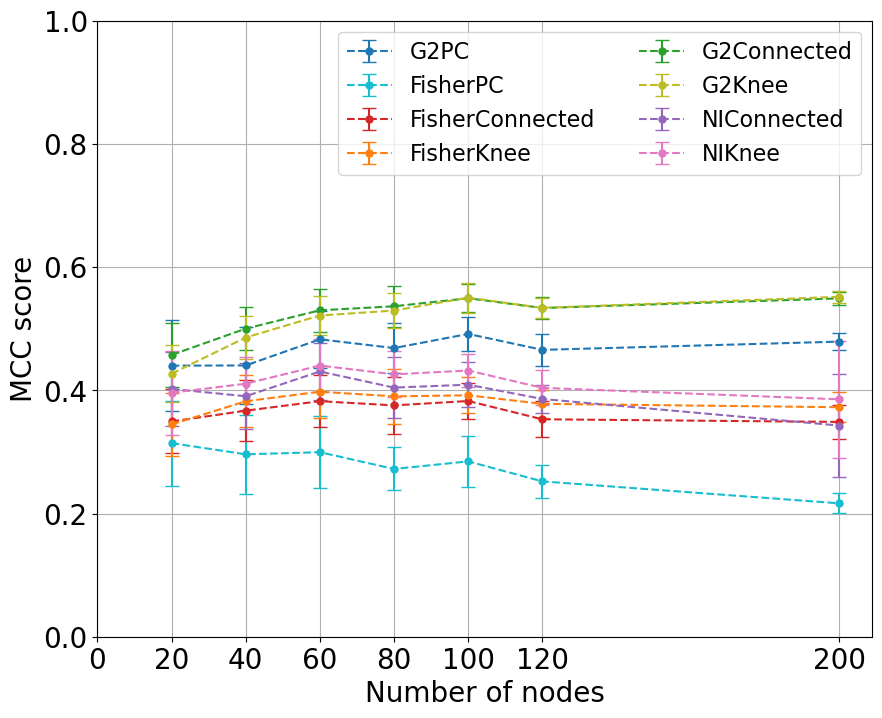

In [15]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base+3
j=1
n_nodes = np.unique(data[j][:,0]) ##number of nodes

for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.ylim(0,1)
pl.legend(ncols=2,prop={'size': 16})
pl.ylabel("MCC score")
pl.xlabel("Number of nodes")
pl.savefig("MCC_DenseNO_3.eps",format='eps')
pl.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


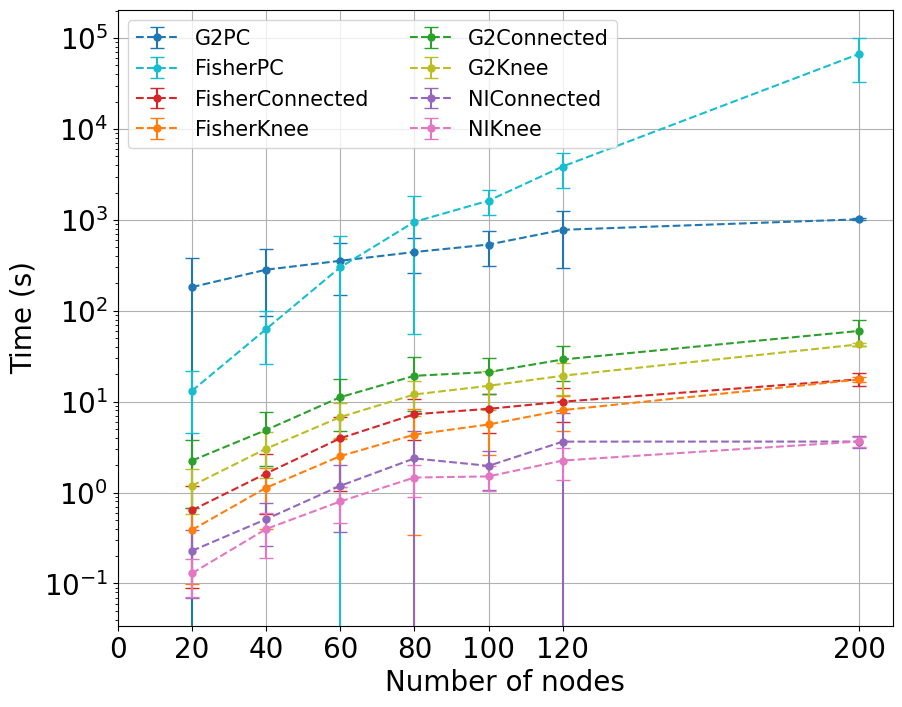

In [16]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns=base
n_nodes = np.unique(data[j][:,0]) ##number of nodes

j=0
for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200])
pl.yscale("log")
pl.legend(ncols=2,prop={'size': 15})
pl.ylabel("Time (s)")
pl.xlabel("Number of nodes")
pl.savefig("Time_DenseNO_3.eps",format='eps')
pl.show()